**NAMA: HENDRI ANGKASA**<BR>
**RAKAMIN ACADEMY BATCH 26**

# DATA PREPARATION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
df = pd.read_excel('/content/gdrive/My Drive/Rakamin Mini Project/Improving Employee Retention by Predicting Employee Attrition Using Machine Learning/Improving Employee Retention by Predicting Employee Attrition Using Machine Learning.xlsx')
df.head(5)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06


In [4]:
df_copy = df.copy()

# DATA PRE-PROCESSING

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

## Missing Values 

In [6]:
(df.isnull().sum()[(df.isnull().sum())!=0]).sort_values(ascending=False) # filter hanya feature yang mengandung nilai null

IkutProgramLOP                        258
AlasanResign                           66
JumlahKetidakhadiran                    6
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
dtype: int64

In [7]:
null_percentage = (df.isnull().sum()*100)/len(df)
null_percentage[null_percentage!=0].sort_values(ascending=False) # persentase nilai null

IkutProgramLOP                        89.895470
AlasanResign                          22.996516
JumlahKetidakhadiran                   2.090592
SkorKepuasanPegawai                    1.742160
JumlahKeikutsertaanProjek              1.045296
JumlahKeterlambatanSebulanTerakhir     0.348432
dtype: float64

In [8]:
null_feature = (df.isnull().sum()[(df.isnull().sum())!=0]).sort_values(ascending=False).index.tolist()

In [9]:
for col in null_feature:
    print(f'Value count column {col}:')
    print(df[col].value_counts())
    print()          

Value count column IkutProgramLOP:
1.0    15
0.0    14
Name: IkutProgramLOP, dtype: int64

Value count column AlasanResign:
masih_bekerja               132
jam_kerja                    16
ganti_karir                  14
kejelasan_karir              11
tidak_bisa_remote            11
toxic_culture                10
leadership                    9
tidak_bahagia                 8
internal_conflict             4
Product Design (UI & UX)      4
apresiasi                     2
Name: AlasanResign, dtype: int64

Value count column JumlahKetidakhadiran:
4.0     20
2.0     20
15.0    19
7.0     17
16.0    17
6.0     16
14.0    16
3.0     16
19.0    15
13.0    15
17.0    14
1.0     14
20.0    13
9.0     12
11.0    12
10.0    10
8.0     10
5.0      9
12.0     7
18.0     7
50.0     1
55.0     1
Name: JumlahKetidakhadiran, dtype: int64

Value count column SkorKepuasanPegawai:
3.0    96
5.0    91
4.0    85
2.0     8
1.0     2
Name: SkorKepuasanPegawai, dtype: int64

Value count column JumlahKeikutser

In [10]:
df[df['AlasanResign'].isnull()]['TanggalResign'].value_counts()

-    66
Name: TanggalResign, dtype: int64

In [11]:
df[df['JumlahKetidakhadiran'].isnull()]

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
15,enviousSalami4,106710,Belum_menikah,Wanita,FullTime,Software Engineer (Front End),Senior_level,Sangat_kurang,Jakarta Utara,LinkedIn,...,+6285856642xxx,enviousSalami4948@hotmail.com,Doktor,1,NaN,toxic_culture,1985-03-15,2011-01-10,2015-01-05,2019-08-04
21,dejectedPolenta7,101120,Lainnya,Wanita,FullTime,Scrum Master,Mid_level,Sangat_kurang,Jakarta Barat,Indeed,...,+6285591576xxx,dejectedPolenta7016@proton.com,Sarjana,1,NaN,masih_bekerja,1981-03-26,2011-07-05,2019-03-02,-
29,grizzledFlamingo9,106473,Menikah,Wanita,FullTime,Software Engineer (Back End),Mid_level,Biasa,Jakarta Utara,LinkedIn,...,+6289673952xxx,grizzledFlamingo9139@proton.com,Doktor,1,NaN,masih_bekerja,1973-05-27,2015-01-05,2019-2-13,-
53,selfishBasmati2,110407,Lainnya,Wanita,FullTime,Product Design (UI & UX),Freshgraduate_program,Biasa,Jakarta Timur,Diversity_Job_Fair,...,+6285718122xxx,selfishBasmati2000@hotmail.com,Magister,1,NaN,tidak_bahagia,1987-04-04,2015-2-16,2020-2-18,2018-9-23
54,adoringCardinal9,101188,Lainnya,Wanita,FullTime,Data Analyst,Mid_level,Sangat_bagus,Jakarta Barat,LinkedIn,...,+6289841872xxx,adoringCardinal9745@yahoo.com,Sarjana,1,NaN,masih_bekerja,1987-05-21,2015-3-30,2020-02-07,-
67,mellowCheese1,105779,Bercerai,Pria,Outsource,Software Engineer (Back End),Mid_level,Kurang,Jakarta Barat,Employee_Referral,...,+6287742497xxx,mellowCheese1411@icloud.com,Doktor,1,NaN,masih_bekerja,1985-09-15,2015-3-30,2020-2-18,-


In [12]:
df[df['JumlahKetidakhadiran']==0]

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign


In [13]:
df[df['SkorKepuasanPegawai'].isnull()]

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
8,lyingMussel8,110533,Bercerai,Pria,FullTime,Software Engineer (Android),Senior_level,Sangat_kurang,Jakarta Selatan,Employee_Referral,...,+6281276485xxx,lyingMussel8944@proton.com,Magister,1,NaN,masih_bekerja,1980-08-26,2016-07-06,2020-2-28,-
25,needySyrup4,101226,Bercerai,Pria,FullTime,Product Manager,Freshgraduate_program,Biasa,Jakarta Pusat,Diversity_Job_Fair,...,+6283112696xxx,needySyrup4506@hotmail.com,Magister,1,NaN,ganti_karir,1986-10-05,2012-2-15,2020-2-22,2018-2-19
55,importedApricots7,105820,Menikah,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Barat,Indeed,...,+6289594763xxx,importedApricots7729@hotmail.com,Sarjana,1,0.0,masih_bekerja,1971-10-23,2015-2-16,2016-1-20,-
122,puzzledBurritos7,111373,Belum_menikah,Wanita,Outsource,Software Engineer (Android),Mid_level,Kurang,Jakarta Timur,LinkedIn,...,+6281254157xxx,puzzledBurritos7565@icloud.com,Sarjana,1,NaN,masih_bekerja,1979-03-10,2012-04-02,2020-1-14,-
166,resolvedCod5,110380,Belum_menikah,Pria,FullTime,Product Design (UI & UX),Freshgraduate_program,Biasa,Jakarta Pusat,Google_Search,...,+6287879882xxx,resolvedCod5392@outlook.com,Sarjana,1,NaN,masih_bekerja,1970-12-22,2012-04-02,2020-1-14,-


In [14]:
df['SkorKepuasanPegawai'].describe()

count    282.000000
mean       3.904255
std        0.913355
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: SkorKepuasanPegawai, dtype: float64

In [15]:
df['JumlahKeikutsertaanProjek'].describe()

count    284.000000
mean       1.179577
std        2.294441
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        8.000000
Name: JumlahKeikutsertaanProjek, dtype: float64

In [16]:
df['JumlahKeterlambatanSebulanTerakhir'].describe()

count    286.000000
mean       0.412587
std        1.275016
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: JumlahKeterlambatanSebulanTerakhir, dtype: float64

- Untuk nilai null pada feature `AlasanResign` akan diganti menjadi **masih_bekerja** karena belum ada nilai pada feature `TanggalResign` yang berarti karyawan tersebut belum resign. <br>
- Untuk feature `IkutProgramLOP` akan dihapus saja karena nilai nullnya yang terlalu banyak (hampir 90%). <br>
- Untuk nilai null pada feature `JumlahKetidakhadiran` akan diisi dengan 0 dimana asumsi kita bahwa nilai null tersebut adalah berarti karyawan belum pernah tidak hadir. Asumsi ini didukung dengan tidak adanya nilai 0 pada feature tersebut.<br>
- Untuk nilai null pada feature `SkorKepuasanPegawai`, `JumlahKeikutsertaanProjek` dan `JumlahKeterlambatanSebulanTerakhir` akan diisi dengan nilai median dari masing-masing kolom.

In [17]:
df['AlasanResign'].fillna('masih_bekerja',inplace=True)
df['AlasanResign'].fillna('masih_bekerja',inplace=True)
df['JumlahKetidakhadiran'].fillna(0,inplace=True)
df['SkorKepuasanPegawai'].fillna(df['SkorKepuasanPegawai'].median(),inplace=True)
df['JumlahKeikutsertaanProjek'].fillna(df['JumlahKeikutsertaanProjek'].median(),inplace=True)
df['JumlahKeterlambatanSebulanTerakhir'].fillna(df['JumlahKeterlambatanSebulanTerakhir'].median(),inplace=True)

df.drop('IkutProgramLOP',axis=1,inplace=True)

In [18]:
df.isnull().sum()

Username                              0
EnterpriseID                          0
StatusPernikahan                      0
JenisKelamin                          0
StatusKepegawaian                     0
Pekerjaan                             0
JenjangKarir                          0
PerformancePegawai                    0
AsalDaerah                            0
HiringPlatform                        0
SkorSurveyEngagement                  0
SkorKepuasanPegawai                   0
JumlahKeikutsertaanProjek             0
JumlahKeterlambatanSebulanTerakhir    0
JumlahKetidakhadiran                  0
NomorHP                               0
Email                                 0
TingkatPendidikan                     0
PernahBekerja                         0
AlasanResign                          0
TanggalLahir                          0
TanggalHiring                         0
TanggalPenilaianKaryawan              0
TanggalResign                         0
dtype: int64

## Duplicated Values

In [19]:
df.duplicated().sum()

0

Jika dilihat secara sekilas, tidak ada baris yang duplikat. Namun, kita akan coba melihat dari Username.

In [20]:
df['Username'].value_counts().sort_values(ascending=False)

boredEggs0         2
brainyMagpie7      2
jumpyTomatoe4      1
grizzledSnipe7     1
emptyMacaw4        1
                  ..
exactingZebra6     1
pluckyMacaw2       1
spiritedWeaver4    1
affectedPup0       1
puzzledFish5       1
Name: Username, Length: 285, dtype: int64

In [21]:
df[df['Username']=='boredEggs0']

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
158,boredEggs0,100326,Bercerai,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,Diversity_Job_Fair,...,12.0,+6283854646xxx,boredEggs0834@outlook.com,Sarjana,1,ganti_karir,1974-01-12,2011-01-10,2017-1-30,2016-3-31
204,boredEggs0,106285,Lainnya,Wanita,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Diversity_Job_Fair,...,12.0,+6285733263xxx,boredEggs0225@outlook.com,Sarjana,1,jam_kerja,1967-06-03,2013-04-01,2020-2-13,2014-8-19


In [22]:
df[df['Username']=='brainyMagpie7']

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
80,brainyMagpie7,106620,Belum_menikah,Pria,FullTime,Software Engineer (Back End),Senior_level,Biasa,Jakarta Pusat,Indeed,...,9.0,+6281267984xxx,brainyMagpie7048@gmail.com,Doktor,1,internal_conflict,1986-09-01,2014-9-29,2020-1-18,2019-06-06
120,brainyMagpie7,101264,Bercerai,Pria,FullTime,Product Design (UI & UX),Freshgraduate_program,Kurang,Jakarta Barat,Indeed,...,17.0,+6285946196xxx,brainyMagpie7608@proton.com,Magister,1,masih_bekerja,1970-04-25,2017-02-10,2020-2-25,-


Kedua username yang sama tersebut memiliki identitas yang berbeda, sehingga disimpulkan memang tidak ada data yang duplikat.

## Grouping Numerical and Categorical Data

In [23]:
cats = df.select_dtypes('object').columns.tolist()
nums = df.select_dtypes(exclude='object').columns.tolist()

### Numerical Data

In [24]:
df[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
EnterpriseID,287.0,105923.324042,4044.977599,100282.0,101269.0,106069.0,110514.5,111703.0
SkorSurveyEngagement,287.0,3.101045,0.836388,1.0,3.0,3.0,4.0,5.0
SkorKepuasanPegawai,287.0,3.905923,0.905423,1.0,3.0,4.0,5.0,5.0
JumlahKeikutsertaanProjek,287.0,1.167247,2.285537,0.0,0.0,0.0,0.0,8.0
JumlahKeterlambatanSebulanTerakhir,287.0,0.411150,1.273018,0.0,0.0,0.0,0.0,6.0
JumlahKetidakhadiran,287.0,10.229965,6.991709,0.0,4.0,10.0,15.0,55.0


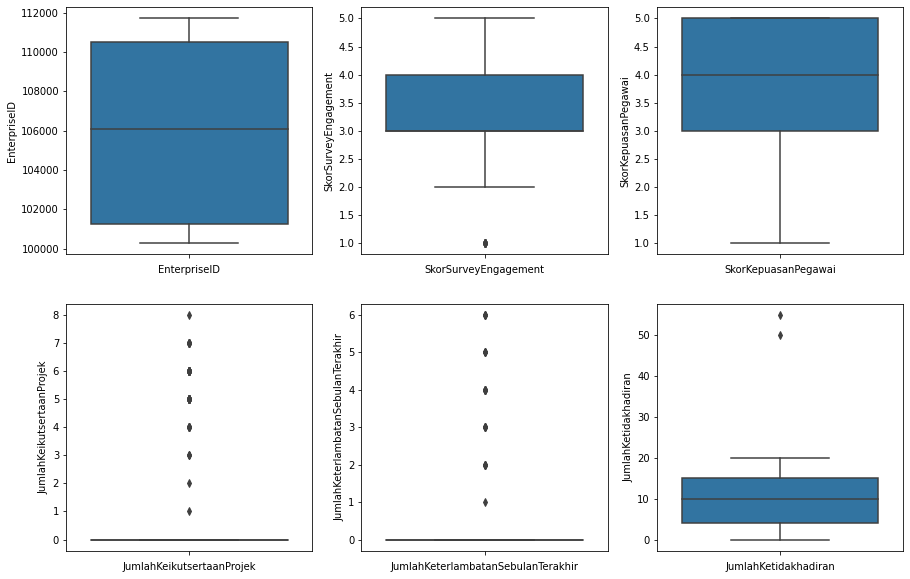

In [25]:
plt.figure(figsize=(15,10))

for i in range(0,len(nums)):
       plt.subplot(2, 3, i+1)
       sns.boxplot(y=df[nums[i]], orient='v')
       plt.xlabel(nums[i])

In [26]:
df[df['JumlahKetidakhadiran']>30]

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
12,yearningBagels0,100895,Menikah,Pria,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Pusat,LinkedIn,...,50.0,+6287794061xxx,yearningBagels0311@outlook.com,Magister,1,masih_bekerja,1988-08-10,2013-11-11,2020-01-08,-
115,wingedLeopard7,106436,Lainnya,Wanita,FullTime,Software Engineer (Front End),Mid_level,Biasa,Jakarta Pusat,Google_Search,...,55.0,+6289913280xxx,wingedLeopard7878@hotmail.com,Sarjana,1,masih_bekerja,1973-01-12,2011-11-28,2020-02-11,-


Nilai jumlah ketidakhadiran yang ekstrim pada feature tersebut wajar karena kedua karyawan telah bekerja selama 6 dan 8 tahun.

### Categorical Data

In [27]:
for col in cats:
    print(f'Value count column {col}:')
    print(df[col].value_counts().sort_values(ascending=False))
    print()          

Value count column Username:
boredEggs0         2
brainyMagpie7      2
jumpyTomatoe4      1
grizzledSnipe7     1
emptyMacaw4        1
                  ..
exactingZebra6     1
pluckyMacaw2       1
spiritedWeaver4    1
affectedPup0       1
puzzledFish5       1
Name: Username, Length: 285, dtype: int64

Value count column StatusPernikahan:
Belum_menikah    132
Menikah           57
Lainnya           48
Bercerai          47
-                  3
Name: StatusPernikahan, dtype: int64

Value count column JenisKelamin:
Wanita    167
Pria      120
Name: JenisKelamin, dtype: int64

Value count column StatusKepegawaian:
FullTime      217
Outsource      66
Internship      4
Name: StatusKepegawaian, dtype: int64

Value count column Pekerjaan:
Software Engineer (Back End)      109
Software Engineer (Front End)      72
Software Engineer (Android)        24
Product Design (UI & UX)           24
Product Manager                    17
Data Analyst                       16
Data Engineer                    

**StatusPernikahan**

Nilai "-" kita ganti menjadi "Belum_menikah" (nilai mode).

In [28]:
df['StatusPernikahan'].replace('-','Belum_menikah',inplace=True)

**PernahBekerja**

Seluruh nilai pada feature ini adalah sama yaitu "1" dan "yes" yang artinya adalah sama. Feature ini dapat kita remove saja karena hanya mengandung 1 nilai unique.

In [29]:
df.drop('PernahBekerja',axis=1,inplace=True)

## Drop Features

Feature `NomorHP` dan `Email` didrop saja karena hanya berperan sebagai identitas user dan bukan merupakan faktor penentu employee attrition.

In [30]:
df.drop(['NomorHP','Email'],axis=1,inplace=True)

## Feature Extraction (TahunHiring and TahunResign Data)

In [31]:
df['TanggalResign'].replace('-','NaN',inplace=True) # mengubah value dari yang belum resign menjadi null agar feature dapat diconvert ke datetime

In [32]:
df['TanggalHiring'] = pd.to_datetime(df['TanggalHiring'])
df['TanggalResign'] = pd.to_datetime(df['TanggalResign'])

Kita take note sendiri bahwa data tahun 1970 di TanggalResign adalah merupakan tanggal fiksi yang artinya karyawan terkait masih bekerja dan belum resign.

In [33]:
df['TahunResign'] = df['TanggalResign'].dt.year
df['TahunHiring'] = df['TanggalHiring'].dt.year

# TOTAL CHANGES IN NUMBER OF EMPLOYESS OVER THE YEARS

## Resign

In [34]:
df_group_resign = df.groupby(['TahunResign']).agg({'Username':['count']}).reset_index()
df_group_resign.columns = ['Tahun','Jumlah Resign']
df_group_resign['Tahun'] = df_group_resign['Tahun'].astype(int)
df_group_resign

,Tahun,Jumlah Resign
0,2013,5
1,2014,12
2,2015,8
3,2016,8
4,2017,19
5,2018,26
6,2019,5
7,2020,6


## Hiring

In [35]:
df_group_hiring = df.groupby(['TahunHiring']).agg({'Username':['count']}).reset_index()
df_group_hiring.columns = ['Tahun','Jumlah Hiring']
df_group_hiring['Tahun'] = df_group_hiring['Tahun'].astype(int)
df_group_hiring

,Tahun,Jumlah Hiring
0,2006,1
1,2007,2
2,2008,2
3,2009,7
4,2010,8
5,2011,76
6,2012,41
7,2013,43
8,2014,56
9,2015,31


## Merge Table

In [36]:
df_group = df_group_resign.merge(df_group_hiring, how='outer').sort_values('Tahun',ascending=True).reset_index(drop=True)
df_group.fillna(0,inplace=True)
df_group['Jumlah Resign'] = df_group['Jumlah Resign'].astype(int)
df_group['Jumlah Hiring'] = df_group['Jumlah Hiring'].astype(int)
df_group

,Tahun,Jumlah Resign,Jumlah Hiring
0,2006,0,1
1,2007,0,2
2,2008,0,2
3,2009,0,7
4,2010,0,8
5,2011,0,76
6,2012,0,41
7,2013,5,43
8,2014,12,56
9,2015,8,31


In [37]:
df_group['Jumlah Karyawan'] = 0
for x in range(1,len(df_group)):
  df_group['Jumlah Karyawan'][0] = df_group['Jumlah Hiring'][0] - df_group['Jumlah Resign'][0]
  df_group['Jumlah Karyawan'][x] = df_group['Jumlah Karyawan'][x-1] + df_group['Jumlah Hiring'][x] - df_group['Jumlah Resign'][x]

In [38]:
df_group

,Tahun,Jumlah Resign,Jumlah Hiring,Jumlah Karyawan
0,2006,0,1,1
1,2007,0,2,3
2,2008,0,2,5
3,2009,0,7,12
4,2010,0,8,20
5,2011,0,76,96
6,2012,0,41,137
7,2013,5,43,175
8,2014,12,56,219
9,2015,8,31,242


## Data Visualization

In [39]:
import plotly.graph_objects as go

In [40]:
fig = go.Figure(go.Waterfall(
    name = "Employee", orientation = "v", 
    x = df_group['Tahun'],
    textposition = "auto",
    text = df_group['Jumlah Karyawan'],
    y = [(df_group['Jumlah Karyawan'][x] if x==0 else df_group['Jumlah Karyawan'][x]-df_group['Jumlah Karyawan'][x-1]) for x in range(0,len(df_group))],
    connector = {"line":{"color":"black"}},
    increasing = {"marker":{"color":"green"}},
    decreasing = {"marker":{"color":"red"}},
))

fig.update_layout(title='Total Change in Number of Employees over the years',
                  xaxis=dict(range=[2005.5,2020.5],
                  tickmode = "linear",
                  tick0 = 2006,
                  dtick = 1),
                  yaxis_title='Total Employees', xaxis_title="Year",
                  width=1500,
                  height=800,
                  margin=dict(t=80, b=20, l=50, r=50),
                  hovermode="x unified")


fig.show()

Grafik tersebut menunjukkan pertumbuhan jumlah karyawan dari tahun ke tahun sejak 2006 - 2020. <br>
Terlihat bahwa kondisi perusahaan sedang mengkhawatirkan karena jumlah karyawannya terus berkurang selama 4 tahun terakhir. Ini bisa menjadi tanda bahwa perusahaan mungkin mengalami masalah internal seperti kurangnya kesempatan untuk berkembang, lingkungan kerja yang buruk, atau masalah keuangan.

# EMPLOYEE RETENTION PERCENTAGE BASED ON PROFESSION

## Resign

In [41]:
df_resign = df[df['AlasanResign']!='masih_bekerja']

In [42]:
df_pekerjaan_resign = df_resign.groupby('Pekerjaan').agg({'Username':'count'}).reset_index()
df_pekerjaan_resign.columns = ['Pekerjaan','Jumlah Employee Resign']
df_pekerjaan_resign

,Pekerjaan,Jumlah Employee Resign
0,Data Analyst,8
1,Data Engineer,3
2,Product Design (UI & UX),9
3,Product Manager,6
4,Software Engineer (Android),7
5,Software Engineer (Back End),28
6,Software Engineer (Front End),28


## Current Employee

In [43]:
df_current = df[df['AlasanResign']=='masih_bekerja']

In [44]:
df_pekerjaan_current = df_current.groupby('Pekerjaan').agg({'Username':'count'}).reset_index()
df_pekerjaan_current.columns = ['Pekerjaan','Jumlah Employee Sekarang']
df_pekerjaan_current

,Pekerjaan,Jumlah Employee Sekarang
0,Data Analyst,8
1,Data Engineer,7
2,DevOps Engineer,3
3,Digital Product Manager,2
4,Machine Learning Engineer,2
5,Product Design (UI & UX),15
6,Product Design (UX Researcher),1
7,Product Manager,11
8,Scrum Master,3
9,Software Architect,1


## Merge Table

In [45]:
df_group_2 = df_pekerjaan_resign.merge(df_pekerjaan_current, how='outer').sort_values('Pekerjaan',ascending=True).reset_index(drop=True)
df_group_2.fillna(0,inplace=True)
df_group_2['Jumlah Employee Resign'] = df_group_2['Jumlah Employee Resign'].astype(int)
df_group_2

,Pekerjaan,Jumlah Employee Resign,Jumlah Employee Sekarang
0,Data Analyst,8,8
1,Data Engineer,3,7
2,DevOps Engineer,0,3
3,Digital Product Manager,0,2
4,Machine Learning Engineer,0,2
5,Product Design (UI & UX),9,15
6,Product Design (UX Researcher),0,1
7,Product Manager,6,11
8,Scrum Master,0,3
9,Software Architect,0,1


In [46]:
df_group_2['Jumlah Employee'] = df_group_2['Jumlah Employee Resign'] + df_group_2['Jumlah Employee Sekarang']
df_group_2['Persentase Employee yang Masih Ada'] = df_group_2['Jumlah Employee Sekarang']*100/df_group_2['Jumlah Employee']
df_group_2['Persentase Employee yang Masih Ada'] = round(df_group_2['Persentase Employee yang Masih Ada'],1)
df_group_2.sort_values(['Jumlah Employee'],ascending=False)

,Pekerjaan,Jumlah Employee Resign,Jumlah Employee Sekarang,Jumlah Employee,Persentase Employee yang Masih Ada
11,Software Engineer (Back End),28,81,109,74.3
12,Software Engineer (Front End),28,44,72,61.1
5,Product Design (UI & UX),9,15,24,62.5
10,Software Engineer (Android),7,17,24,70.8
7,Product Manager,6,11,17,64.7
0,Data Analyst,8,8,16,50.0
1,Data Engineer,3,7,10,70.0
2,DevOps Engineer,0,3,3,100.0
8,Scrum Master,0,3,3,100.0
13,Software Engineer (iOS),0,3,3,100.0


## Data Visualization

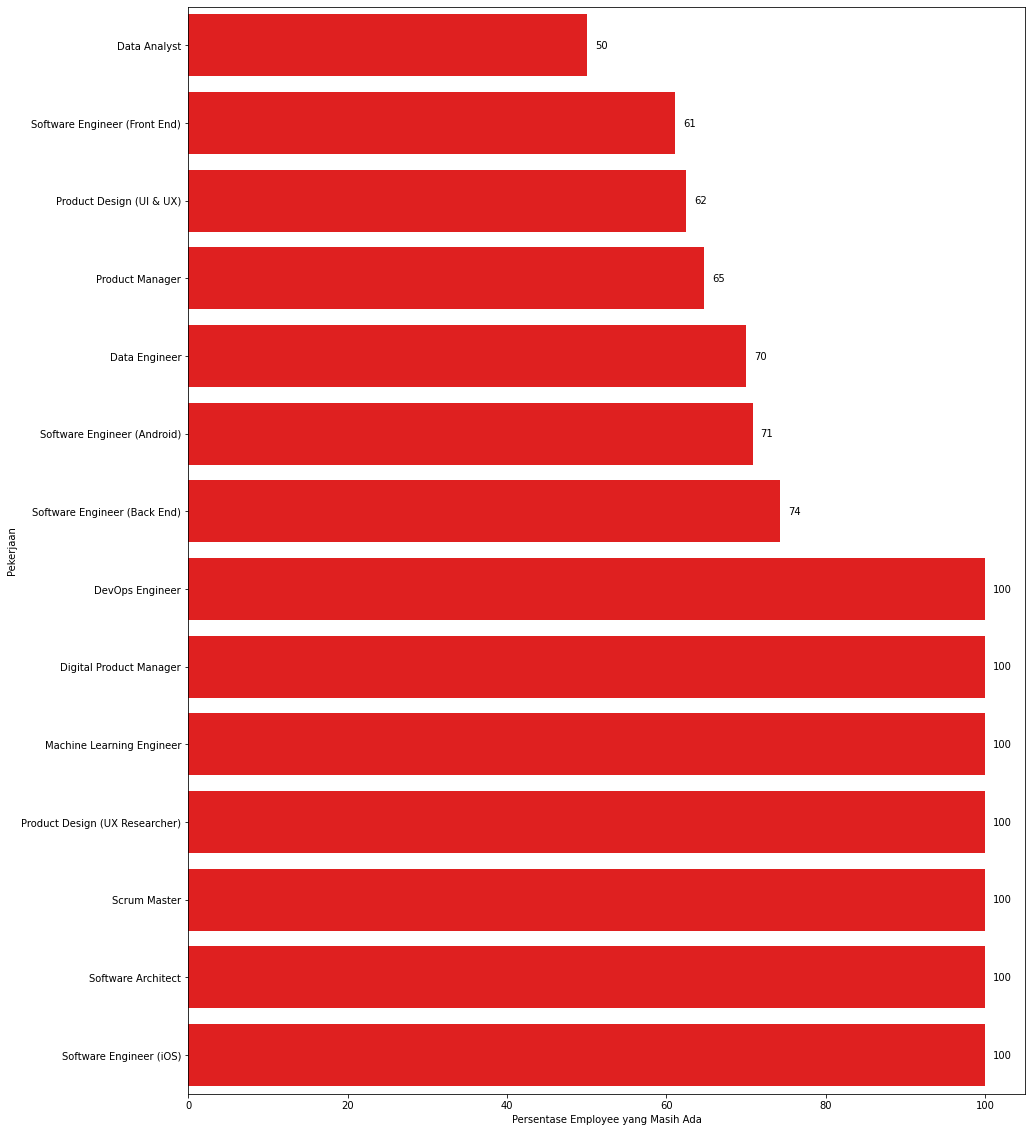

In [47]:
plt.figure(figsize=(15,20))
ax=sns.barplot(y='Pekerjaan', x='Persentase Employee yang Masih Ada', data=df_group_2.sort_values('Persentase Employee yang Masih Ada'),color='red')
for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, 0 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment
plt.show()

Pekerjaan **Data Analyst** memiliki persentase employee retention paling rendah yaitu 50%.

## Data Analyst Profession Resignation Explore

In [48]:
df_da = df[df['Pekerjaan']=='Data Analyst']

def resign(x):
  if x == 'masih_bekerja':
    return 'Masih Bekerja'
  else:
    return 'Resign'

df_da['Resign'] = df_da.apply(lambda x: resign(x['AlasanResign']),axis=1)
df_da['Resign'].value_counts()

<ipython-input-48-b632f9859d81>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Resign           8
Masih Bekerja    8
Name: Resign, dtype: int64

### Jenjang Karir

In [49]:
df_da_jenjangkarir = df_da.groupby(['JenjangKarir','Resign']).agg({'Username':'count'}).reset_index()
df_da_jenjangkarir.columns = ['Jenjang Karir','Status','Jumlah Employee']
df_da_jenjangkarir

,Jenjang Karir,Status,Jumlah Employee
0,Freshgraduate_program,Masih Bekerja,2
1,Freshgraduate_program,Resign,8
2,Mid_level,Masih Bekerja,6


#### Data Visualization

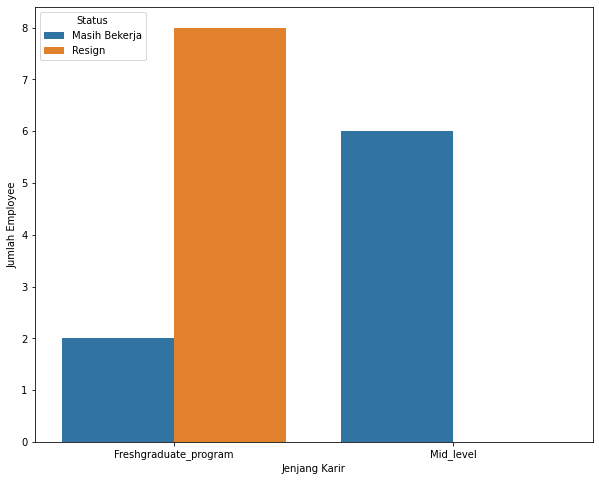

In [50]:
plt.figure(figsize=(10,8))
sns.barplot(x='Jenjang Karir',y='Jumlah Employee',hue='Status',data=df_da_jenjangkarir)
plt.show()

Terlihat bahwa semua karyawan yang resign pada posisi Data Analyst adalah dari **Fresh Graduate Program** dimana program tersebut juga memiliki jumlah karyawan resign yang jauh lebih banyak dibanding jumlah karyawan yang masih bekerja.<br><br>
**Rekomendasi**: Perusahaan dapat memberikan tawaran kepada karyawan program fresh graduate seperti gaji dan benefit yang lebih kompetitif, menawarkan kesempatan pengembangan diri yang lebih baik seperti menyediakan training terkait job desc kepada karyawan baru serta menciptakan lingkungan kerja yang lebih suportif dimana hal ini didukung dengan penelitian bahwa anak generasi muda sekarang lebih peduli dengan kesehatan mental mereka dalam bekerja.

### Performa Karyawan

In [51]:
df_da_performa = df_da.groupby(['PerformancePegawai','Resign']).agg({'Username':'count'}).reset_index()
df_da_performa.columns = ['Performa Karyawan','Status','Jumlah Employee']
df_da_performa

,Performa Karyawan,Status,Jumlah Employee
0,Bagus,Masih Bekerja,2
1,Bagus,Resign,1
2,Biasa,Masih Bekerja,1
3,Biasa,Resign,2
4,Kurang,Masih Bekerja,1
5,Sangat_bagus,Masih Bekerja,4
6,Sangat_bagus,Resign,4
7,Sangat_kurang,Resign,1


In [52]:
performa = ['Sangat_kurang','Kurang','Biasa','Bagus','Sangat_bagus']
df_da_performa['Performa Karyawan'] = pd.Categorical(df_da_performa['Performa Karyawan'], categories=performa, ordered=True) #sort berdasarkan performa
df_da_performa = df_da_performa.sort_values('Performa Karyawan')  # same as you have now; can use inplace=True

#### Data Visualization

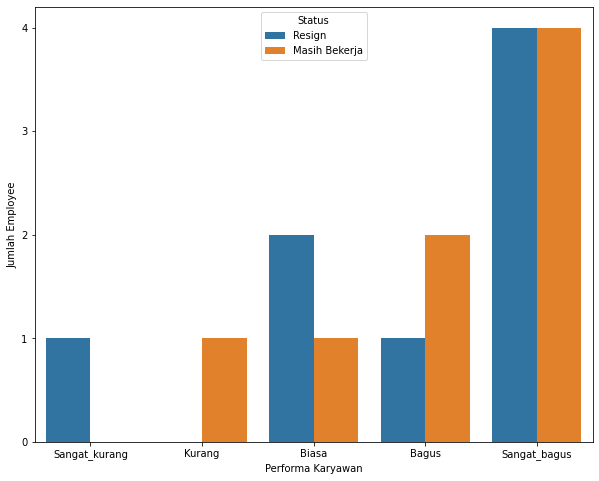

In [53]:
plt.figure(figsize=(10,8))
ax=sns.barplot(x='Performa Karyawan',y='Jumlah Employee',hue='Status',data=df_da_performa)
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.show()

Terlihat bahwa dari 8 karyawan Data Analyst yang Resign, 2 diantaranya memiliki performa bagus dan 4 lainnya sangat bagus. Hal ini tentu sangat merugikan untuk perusahaan karena mayoritas karyawan yang resign adalah karyawan dengan performa yang baik. <br><br>
**Rekomendasi**: Perusahaan dapat menawarkan gaji, benefit dan work-life balance yang lebih baik kepada karyawan dengan performa yang bagus. Selain itu, perusahaan diharapkan dapat menawarkan jenjang karir dan pengembangan diri yang baik kepada karyawan dengan performa bagus agar karyawan tersebut merasa dihargai dan merasa akan memiliki jenjang karir yang baik di perusahaan kita dengan harapan karyawan-karyawan yang bagus tersebut akan memilih untuk bertahan di perusahaan.

### Alasan Resign

In [54]:
df['AlasanResign'].value_counts()

masih_bekerja               198
jam_kerja                    16
ganti_karir                  14
kejelasan_karir              11
tidak_bisa_remote            11
toxic_culture                10
leadership                    9
tidak_bahagia                 8
internal_conflict             4
Product Design (UI & UX)      4
apresiasi                     2
Name: AlasanResign, dtype: int64

In [55]:
df_da_alasan = df_da.groupby(['AlasanResign','Resign']).agg({'Username':'count'}).reset_index()
df_da_alasan.columns = ['Alasan Resign','Status','Jumlah Employee']
df_da_alasan

,Alasan Resign,Status,Jumlah Employee
0,internal_conflict,Resign,2
1,masih_bekerja,Masih Bekerja,8
2,toxic_culture,Resign,6


#### Data Visualization

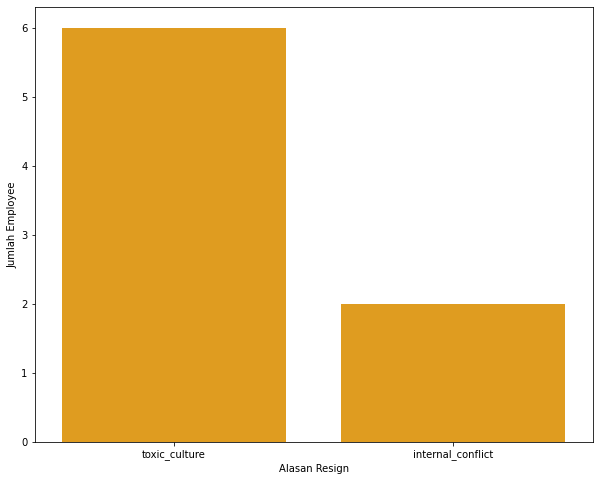

In [56]:
plt.figure(figsize=(10,8))
ax=sns.barplot(x='Alasan Resign',y='Jumlah Employee',data=df_da_alasan[df_da_alasan['Alasan Resign']!='masih_bekerja'].sort_values('Jumlah Employee',ascending=False),color='orange')
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.show()

Dari sekian banyak alasan resign yang ada, 6 dari 8 karyawan Data Analyst resign dengan alasan **toxic culture** dan 2 lainnya resign dengan alasan **internal conflict**. Kedua alasan tersebut cukup menggambarkan bahwa adanya faktor yang kurang baik dari posisi internal Data Analyst perusahaan sendiri.<br><br>
**Rekomendasi**: Perusahaan dapat menciptakan sistem feedback yang efektif agar karyawan merasa mereka dapat memberikan masukan dan menerima umpan balik yang membangun. Perusahaan juga harus dapat mengatasi konflik internal yang terjadi antar karyawan dengan memfasilitasi pertemuan antar karyawan atau mediator untuk menyelesaikan masalah. Selain itu, perusahaan harus mengevaluasi kembali budaya organisasi yang ada untuk mencari tahu apa yang "toxic" bagi karyawan dan memastikan budaya yang dimiliki adalah budaya yang positif dan memotivasi karyawan.

# DATA PREPARATION FOR MODELING

## Feature Engineering

###  Resign

In [57]:
# membuat target (resign atau tidak)
def resign(x):
  if x == 'masih_bekerja':
    return 0
  else:
    return 1

df['Resign'] = df.apply(lambda x: resign(x['AlasanResign']),axis=1)
df['Resign'].value_counts()

0    198
1     89
Name: Resign, dtype: int64

### LamaBekerja

In [58]:
max(df['TahunHiring']) # mencari nilai tahun maksimum

2018

In [59]:
max(df[df['TahunResign'].notnull()]['TahunResign']) # mencari nilai tahun maksimum

2020.0

In [60]:
max(df['TanggalPenilaianKaryawan'])

'2020-2-28'

In [61]:
# membuat feature baru yaitu lama bekerja (dalam tahun)
df['LamaBekerja'] = (df['TahunResign'] - df['TahunHiring']) # menghitung lama bekerja dari tahun resign dikurangi tahun hiring
df['LamaBekerja'].fillna(2020-df['TahunHiring'],inplace=True) # untuk yang masih bekerja, kita akan menggunakan tahun sekarang (asumsi 2020 karena dataset mempunyai data max tahun 2020) dikurangi tahun hiring
df['LamaBekerja'].value_counts() 

 6.0     54
 9.0     53
 7.0     40
 8.0     34
 5.0     33
 4.0     18
 3.0     14
 1.0     10
 0.0      9
 2.0      6
 11.0     5
 10.0     5
 12.0     2
-1.0      1
 14.0     1
-4.0      1
 13.0     1
Name: LamaBekerja, dtype: int64

In [62]:
df = df[df['LamaBekerja']>=0] # remove baris yang memiliki nilai minus (kesalahan data karena tidak mungkin resign terjadi sebelum hiring)

## Feature Selection

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            285 non-null    object        
 1   EnterpriseID                        285 non-null    int64         
 2   StatusPernikahan                    285 non-null    object        
 3   JenisKelamin                        285 non-null    object        
 4   StatusKepegawaian                   285 non-null    object        
 5   Pekerjaan                           285 non-null    object        
 6   JenjangKarir                        285 non-null    object        
 7   PerformancePegawai                  285 non-null    object        
 8   AsalDaerah                          285 non-null    object        
 9   HiringPlatform                      285 non-null    object        
 10  SkorSurveyEngagement      

In [64]:
for col in df.select_dtypes('object').columns:
    print(f'Value count column {col}:')
    print(df[col].value_counts().sort_values(ascending=False))
    print()          

Value count column Username:
brainyMagpie7      2
boredEggs0         2
jumpyTomatoe4      1
grizzledSnipe7     1
emptyMacaw4        1
                  ..
exactingZebra6     1
pluckyMacaw2       1
spiritedWeaver4    1
affectedPup0       1
puzzledFish5       1
Name: Username, Length: 283, dtype: int64

Value count column StatusPernikahan:
Belum_menikah    134
Menikah           56
Lainnya           48
Bercerai          47
Name: StatusPernikahan, dtype: int64

Value count column JenisKelamin:
Wanita    165
Pria      120
Name: JenisKelamin, dtype: int64

Value count column StatusKepegawaian:
FullTime      215
Outsource      66
Internship      4
Name: StatusKepegawaian, dtype: int64

Value count column Pekerjaan:
Software Engineer (Back End)      109
Software Engineer (Front End)      71
Software Engineer (Android)        24
Product Design (UI & UX)           24
Product Manager                    17
Data Analyst                       15
Data Engineer                      10
Scrum Master    

Feature-feature yang diremove:<br>
- **Username** dan **EnterpriseID** -> identitas<br>
- **StatusPernikahan**, **JenisKelamin** dan **AsalDaerah** -> menghindari diskriminasi<br>
- **AlasanResign** -> feature tidak relevan untuk memprediksi resign<br>
- **TanggalLahir**,  **TanggalPenilaianKaryawan**, **TanggalResign** dan **TahunResign** -> feature tidak relevan untuk memprediksi resign<br>
- **TanggalHiring** dan **TahunHiring** -> sudah diconvert ke feature LamaBekerja<br>
- **Pekerjaan** dan **HiringPlatform** -> terlalu banyak nilai unique<br>
- **StatusKepegawaian** -> pada dasarnya hanya pegawai fulltime yang benar-benar bekerja untuk perusahaan sementara outsource dan internship tidak berstatus pegawai perusahaan<br>

In [65]:
df_model = df.drop(['Username','EnterpriseID','StatusPernikahan','JenisKelamin','AsalDaerah','AlasanResign','TanggalLahir','TanggalHiring',
                   'TanggalPenilaianKaryawan','TanggalResign','TahunResign',
                    'StatusKepegawaian','Pekerjaan','HiringPlatform','TahunHiring'],axis=1)#,'TahunHiring','JumlahKeikutsertaanProjek','JumlahKeterlambatanSebulanTerakhir',],axis=1)
df_model.head(3)

,JenjangKarir,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,Resign,LamaBekerja
0,Freshgraduate_program,Sangat_bagus,4,4.0,0.0,0.0,9.0,Magister,0,9.0
1,Freshgraduate_program,Sangat_kurang,4,4.0,4.0,0.0,3.0,Sarjana,1,4.0
2,Freshgraduate_program,Bagus,4,3.0,0.0,0.0,11.0,Magister,1,3.0


In [66]:
df_model.columns

Index(['JenjangKarir', 'PerformancePegawai', 'SkorSurveyEngagement',
       'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek',
       'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran',
       'TingkatPendidikan', 'Resign', 'LamaBekerja'],
      dtype='object')

## Feature Encoding

In [67]:
df_model.select_dtypes('object').head()

,JenjangKarir,PerformancePegawai,TingkatPendidikan
0,Freshgraduate_program,Sangat_bagus,Magister
1,Freshgraduate_program,Sangat_kurang,Sarjana
2,Freshgraduate_program,Bagus,Magister
3,Freshgraduate_program,Bagus,Sarjana
4,Freshgraduate_program,Bagus,Sarjana


### Label Encoding

In [68]:
df_model['PerformancePegawai'].value_counts()

Biasa            84
Bagus            74
Sangat_bagus     72
Kurang           31
Sangat_kurang    24
Name: PerformancePegawai, dtype: int64

In [69]:
mapping_perform = {
    'Sangat_kurang' : 0,
    'Kurang' : 1,
    'Biasa' : 2,
    'Bagus' : 3,
    'Sangat_bagus' : 4
}

df_model['PerformancePegawai'] = df_model['PerformancePegawai'].map(mapping_perform)
df_model['PerformancePegawai'].value_counts()

2    84
3    74
4    72
1    31
0    24
Name: PerformancePegawai, dtype: int64

In [70]:
df_model['TingkatPendidikan'].value_counts()

Sarjana     174
Magister     87
Doktor       24
Name: TingkatPendidikan, dtype: int64

In [71]:
mapping_pend = {
    'Sarjana' : 0,
    'Magister' : 1,
    'Doktor' : 2
}

df_model['TingkatPendidikan'] = df['TingkatPendidikan'].map(mapping_pend)
df_model['TingkatPendidikan'].value_counts()

0    174
1     87
2     24
Name: TingkatPendidikan, dtype: int64

### One Hot Encoding

In [72]:
df_model.select_dtypes('object').head()

,JenjangKarir
0,Freshgraduate_program
1,Freshgraduate_program
2,Freshgraduate_program
3,Freshgraduate_program
4,Freshgraduate_program


In [73]:
df_model.shape

(285, 10)

In [74]:
for col in df_model.select_dtypes('object').columns:
  dummies = pd.get_dummies(df_model[col],prefix=col)
  df_model = pd.concat([df_model.drop(col,axis=1),dummies],axis=1)

df_model.head()

,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,Resign,LamaBekerja,JenjangKarir_Freshgraduate_program,JenjangKarir_Mid_level,JenjangKarir_Senior_level
0,4,4,4.0,0.0,0.0,9.0,1,0,9.0,1,0,0
1,0,4,4.0,4.0,0.0,3.0,0,1,4.0,1,0,0
2,3,4,3.0,0.0,0.0,11.0,1,1,3.0,1,0,0
3,3,3,3.0,0.0,4.0,6.0,0,0,6.0,1,0,0
4,3,3,3.0,0.0,0.0,11.0,0,1,5.0,1,0,0


## Handling Outlier

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



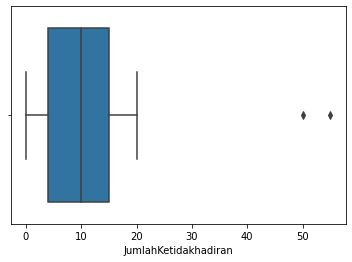

In [75]:
# satu-satunya feature tersisa yang memiliki value yang besar (bukan satuan)

sns.boxplot(df_model['JumlahKetidakhadiran'])

In [76]:
df_model = df_model[df_model['JumlahKetidakhadiran']<30]

## Data Train/Test Split

In [77]:
X = df_model.drop('Resign',axis=1)
y = df_model['Resign']

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify= y, test_size=0.3, random_state=42)

## Feature Scaling

In [79]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 251 to 171
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   PerformancePegawai                  198 non-null    int64  
 1   SkorSurveyEngagement                198 non-null    int64  
 2   SkorKepuasanPegawai                 198 non-null    float64
 3   JumlahKeikutsertaanProjek           198 non-null    float64
 4   JumlahKeterlambatanSebulanTerakhir  198 non-null    float64
 5   JumlahKetidakhadiran                198 non-null    float64
 6   TingkatPendidikan                   198 non-null    int64  
 7   LamaBekerja                         198 non-null    float64
 8   JenjangKarir_Freshgraduate_program  198 non-null    uint8  
 9   JenjangKarir_Mid_level              198 non-null    uint8  
 10  JenjangKarir_Senior_level           198 non-null    uint8  
dtypes: float64(5), int64(3), uint8(3)
memory us

In [80]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

for col in X_train.columns:
  norm_scaler = MinMaxScaler()
  X_train[col] = norm_scaler.fit_transform(X_train[col].values.reshape(len(X_train),1))
  X_test[col] = norm_scaler.transform(X_test[col].values.reshape(len(X_test),1))

X_train.head()

,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,LamaBekerja,JenjangKarir_Freshgraduate_program,JenjangKarir_Mid_level,JenjangKarir_Senior_level
251,1.0,0.75,0.5,0.000000,0.0,0.85,0.0,0.642857,1.0,0.0,0.0
64,1.0,0.00,0.5,0.000000,0.0,0.30,0.0,0.714286,1.0,0.0,0.0
85,0.5,0.75,0.5,0.000000,0.0,0.35,0.5,0.642857,1.0,0.0,0.0
202,0.5,0.75,0.5,0.714286,0.0,0.10,0.5,0.214286,1.0,0.0,0.0
229,1.0,0.75,1.0,0.000000,0.0,0.75,0.0,0.857143,0.0,1.0,0.0


## SMOTE

In [81]:
y_train.value_counts()

0    137
1     61
Name: Resign, dtype: int64

Jumlah target tidak balance, sehingga akan dilakukan oversampling dengan SMOTE.

In [82]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

X_train_1 = X_train.copy() #backup
y_train_1 = y_train.copy() #backup

#X_train, y_train = RandomOverSampler(random_state=42).fit_resample(X_train,y_train)
#X_train, y_train = RandomUnderSampler(random_state=42).fit_resample(X_train,y_train)
X_train, y_train = SMOTE().fit_resample(X_train,y_train)

# MODELING STAGE

Metrics yang akan kita gunakan untuk modeling kasus ini adalah **ROC AUC** yaitu mengukur kapabilitas model dalam membedakan kelas positif dan negatif karena baik dalam memprediksi ketepatan kelas positif dan negatif adalah sama pentingnya.<br>
Ketika perusahaan salah dalam memprediksi suatu karyawan berpotensi resign namun nyatanya tidak maka perusahaan telah rugi dalam hal resource (waktu dan uang) untuk mempertahankan karyawan tersebut.  Sebaliknya, jika perusahaan salah dalam memprediksi suatu karyawan tidak resign namun nyatanya resign, maka perusahaan berpotensi kehilangan karyawan yang bagus. 

In [83]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn import metrics

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))

def confusion_matrix(model):
    y_pred = model.predict(X_test)
    cm = metrics.confusion_matrix(y_test,y_pred,labels=[1,0])
    df_cm = pd.DataFrame(cm, index = [i for i in ['1','0']],
                         columns = [i for i in ['Predict 1','Predict 0']])
    plt.figure(figsize=(7,5))
    sns.heatmap(df_cm,annot=True,fmt = 'g',cmap='viridis')

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index = X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize = (10,8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [84]:
import warnings
warnings.filterwarnings("ignore")

## Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
logreg.fit(X_train,y_train)
eval_classification(logreg)

Accuracy (Train Set): 0.78
Accuracy (Test Set): 0.76
Precision (Train Set): 0.78
Precision (Test Set): 0.58
Recall (Train Set): 0.79
Recall (Test Set): 0.81
F1-Score (Train Set): 0.79
F1-Score (Test Set): 0.68
roc_auc (train-proba): 0.87
roc_auc (test-proba): 0.86


In [86]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

penalty = ['l1', 'l2','elasticnet']
C = [0.0001, 0.01, 0.05, 1, 10, 100]
solver=['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
hyperparameters = dict(penalty=penalty, C=C, solver=solver,class_weight='balanced')
cv = StratifiedKFold(random_state=42,shuffle=True)

logreg = LogisticRegression()
rs = RandomizedSearchCV(logreg, hyperparameters, scoring='roc_auc', random_state=42, cv=cv)
rs.fit(X_train, y_train)
eval_classification(rs)

Accuracy (Train Set): 0.79
Accuracy (Test Set): 0.75
Precision (Train Set): 0.78
Precision (Test Set): 0.57
Recall (Train Set): 0.80
Recall (Test Set): 0.81
F1-Score (Train Set): 0.79
F1-Score (Test Set): 0.67
roc_auc (train-proba): 0.88
roc_auc (test-proba): 0.86


## Decision Tree

In [87]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

eval_classification(dt)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.76
Precision (Train Set): 1.00
Precision (Test Set): 0.59
Recall (Train Set): 1.00
Recall (Test Set): 0.73
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.66
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.76


In [88]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

param_grid = { 
    "min_samples_leaf":[int(x) for x in np.linspace(2, 100, 50)],
    "min_samples_split":[int(x) for x in np.linspace(2, 30, 20)],
    "max_depth": [int(x) for x in np.linspace(2, 100, 50)]
    }
# Set up score
scoring = ['roc_auc']
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


random_search = RandomizedSearchCV(estimator=dt, 
                           param_distributions=param_grid, 
                           n_iter=100,
                           scoring=scoring, 
                           refit='roc_auc', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0, random_state=42)

random_result = random_search.fit(X_train, y_train)

eval_classification(random_result)

Accuracy (Train Set): 0.84
Accuracy (Test Set): 0.74
Precision (Train Set): 0.82
Precision (Test Set): 0.56
Recall (Train Set): 0.85
Recall (Test Set): 0.73
F1-Score (Train Set): 0.84
F1-Score (Test Set): 0.63
roc_auc (train-proba): 0.93
roc_auc (test-proba): 0.83


## Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.84
Precision (Train Set): 1.00
Precision (Test Set): 0.75
Recall (Train Set): 1.00
Recall (Test Set): 0.69
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.72
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.88


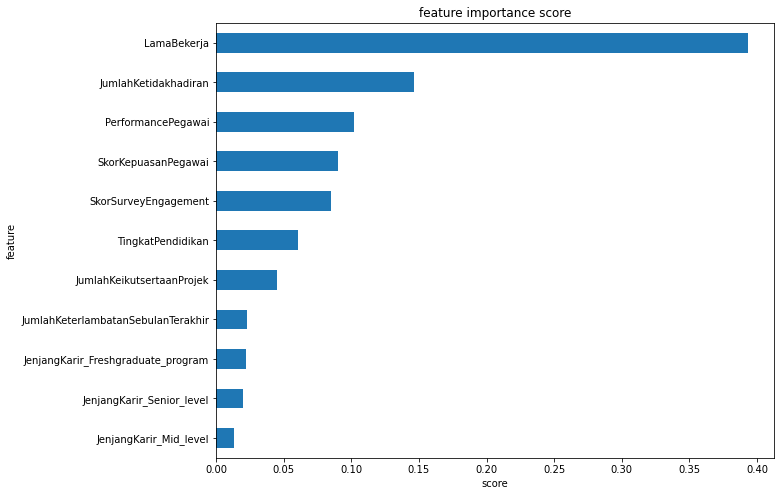

In [90]:
show_feature_importance(rf)

In [91]:
# tuning hyperparameter RF + oversampling
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(1, 200, 100)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 20)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 20)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=42)
rs = RandomizedSearchCV(rf, hyperparameters, scoring='roc_auc', random_state=42, cv=5)
rs.fit(X_train, y_train)
eval_classification(rs)

Accuracy (Train Set): 0.96
Accuracy (Test Set): 0.81
Precision (Train Set): 0.96
Precision (Test Set): 0.67
Recall (Train Set): 0.96
Recall (Test Set): 0.77
F1-Score (Train Set): 0.96
F1-Score (Test Set): 0.71
roc_auc (train-proba): 0.99
roc_auc (test-proba): 0.87


In [92]:
hyperparameter = show_best_hyperparameter(random_result)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 84, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 10, 'min_samples_split': 16, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


### Learning Curve

param value: 2; train: 0.9349459214662476; test: 0.879400260756193
param value: 3; train: 0.9349459214662476; test: 0.879400260756193
param value: 4; train: 0.9349459214662476; test: 0.879400260756193
param value: 5; train: 0.9349459214662476; test: 0.879400260756193
param value: 7; train: 0.9349459214662476; test: 0.879400260756193
param value: 8; train: 0.9349459214662476; test: 0.879400260756193
param value: 9; train: 0.9349459214662476; test: 0.879400260756193
param value: 11; train: 0.9349459214662476; test: 0.879400260756193
param value: 12; train: 0.9349459214662476; test: 0.879400260756193
param value: 13; train: 0.9349459214662476; test: 0.879400260756193
param value: 14; train: 0.9349459214662476; test: 0.879400260756193
param value: 16; train: 0.9349459214662476; test: 0.879400260756193
param value: 17; train: 0.9349459214662476; test: 0.879400260756193
param value: 18; train: 0.9349459214662476; test: 0.879400260756193
param value: 20; train: 0.9349459214662476; test: 0.879

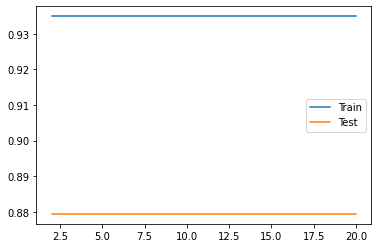

In [93]:
#learning curve
#param_values = [int(x) for x in np.linspace(1, 200, 50)] # n_estimators
#param_values = [int(x) for x in np.linspace(2, 100, 50)] # max_depth
param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
#param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_leaf

train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(n_estimators=41, max_depth=10, min_samples_leaf=11, min_samples_split=c,random_state=7,criterion='gini')
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

In [94]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=41, max_depth=10, min_samples_leaf=11, min_samples_split=c,random_state=7,criterion='gini')
rf.fit(X_train, y_train)
eval_classification(rf)

Accuracy (Train Set): 0.86
Accuracy (Test Set): 0.86
Precision (Train Set): 0.88
Precision (Test Set): 0.79
Recall (Train Set): 0.84
Recall (Test Set): 0.73
F1-Score (Train Set): 0.86
F1-Score (Test Set): 0.76
roc_auc (train-proba): 0.93
roc_auc (test-proba): 0.88


### Confusion Matrix

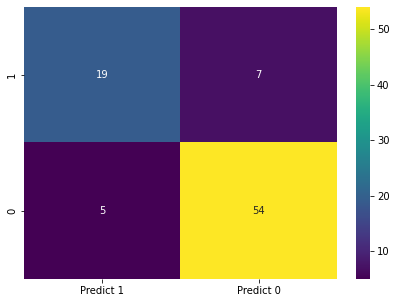

In [95]:
confusion_matrix(rf)

### ROC AUC Plot


In [96]:
y_pred_proba.shape

(85, 2)

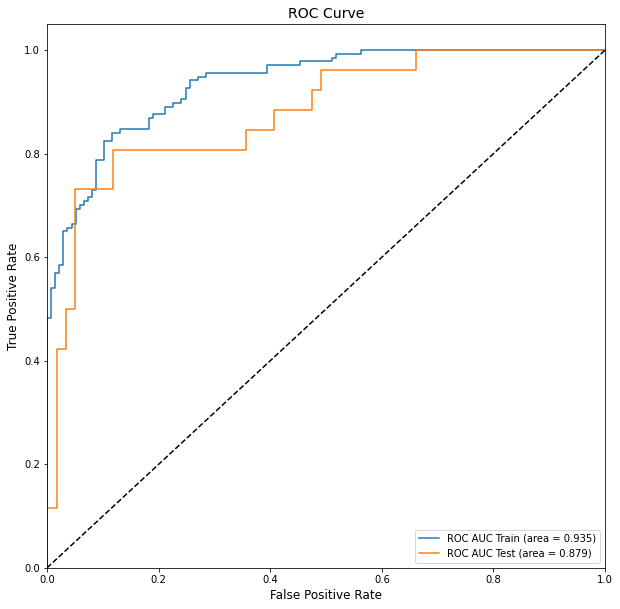

In [97]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = model.predict_proba(X_train)
y_pred_proba_test = model.predict_proba(X_test)

roc_auc = roc_auc_score(y_train, y_pred_proba[:,1])
roc_auc_test = roc_auc_score(y_test, y_pred_proba_test[:,1])
# Calculate the false positive rate and true positive rate at various threshold values
fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba[:,1])
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_proba_test[:,1])

# Plot the ROC curve
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, label='ROC AUC Train (area = {:.3f})'.format(roc_auc))
plt.plot(fpr_test, tpr_test, label='ROC AUC Test (area = {:.3f})'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], 'k--') # plot random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=12)
plt.ylabel('True Positive Rate',fontsize=12)
plt.title('ROC Curve',fontsize=14)
plt.legend(loc="lower right")
plt.show()

Nilai **ROC AUC (Train) = 0.932** dan **ROC AUC (Test) = 0.879** menunjukkan bahwa model sudah cukup baik dalam membedakan kelas positif dan negatif.

### Feature Importance

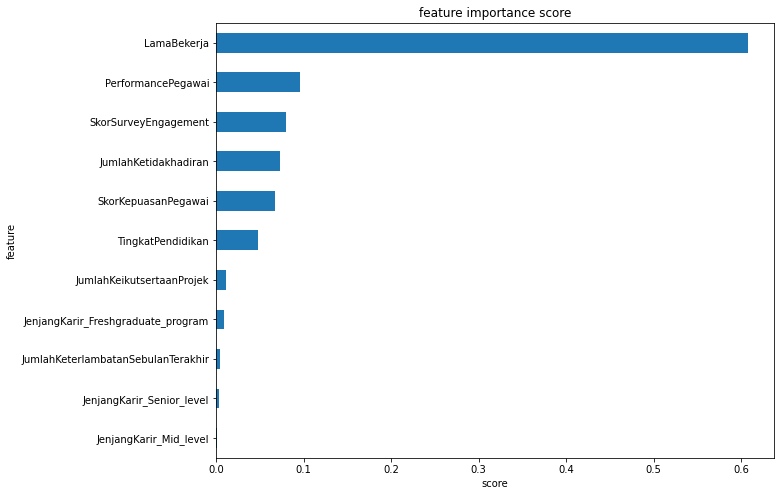

In [99]:
show_feature_importance(rf)

# EXPLAINABLE AI

In [101]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 36.6 MB/s eta 0:00:00


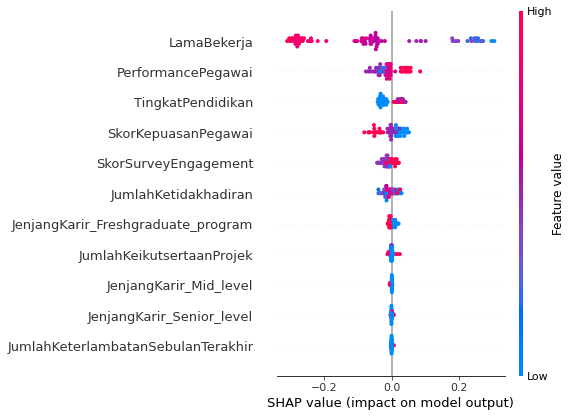

In [102]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test) # Summary shap value terhadap label positive

## Force Plot

In [103]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test.iloc[0,:])

Terlihat bahwa feature `LamaBekerja` merupakan feature paling penting dan sangat dominan dibanding feature lainnya dalam memprediksi kemungkinan resign dari suatu karyawan. Adapun data SHAP value menunjukkan bahwa semakin kecil lama bekerja dari suatu karyawan, maka semakin besar kemungkinan karyawan tersebut untuk resign.

## LamaBekerjaPlot

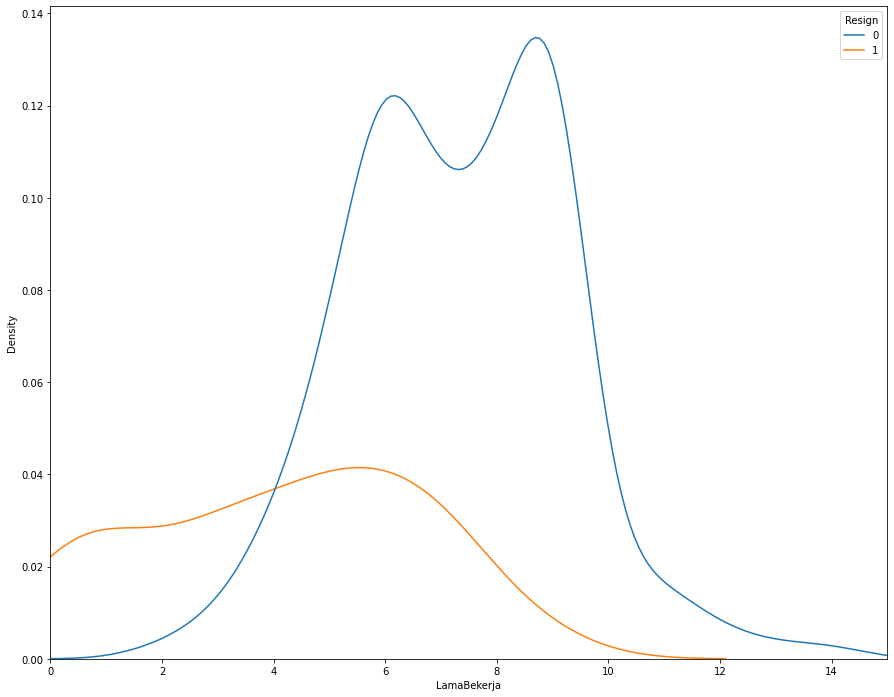

In [116]:
plt.figure(figsize=(15,12))

sns.kdeplot(df_model['LamaBekerja'],hue=df_model['Resign'])
plt.xlim(0,15,1)
plt.show()

Terlihat dari grafik di atas menunjukkan bahwa terdapat turnover yang sangat tinggi pada pegawai yang bekerja 0-4 tahun dimana artinya pegawai baru cenderung resign dibanding pegawai lama.<br>
**Rekomendasi**: Perusahaan dapat meninjau kembali culture perusahaan yang ada agar tidak menciptakan toxic work environment serta mengadakan program pengembangan karir untuk menjaga pegawai-pegawai baru yang memiliki potensi pengembangan diri yang bagus. Selain itu, perusahaan juga dapat melakukan survei dan meminta umpan balik dari pegawai untuk memahami kebutuhan mereka.